In [1]:
from fastai.vision.all import *

/home/justin/.virtualenvs/wgyhtss/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


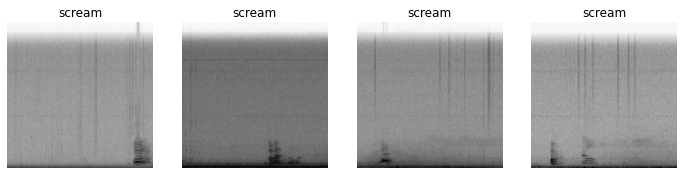

In [2]:
path = Path('train/')

spectrograms = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW), CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=21),
    get_y=parent_label,
    item_tfms=Resize(224))

dls = spectrograms.dataloaders(path)
dls.show_batch(max_n=4, nrows=1)

In [23]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn = learn.load('model')

In [26]:
learn.fine_tune(5, 3e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.075509,0.411716,0.047619,00:18


epoch,train_loss,valid_loss,error_rate,time
0,0.141462,0.367369,0.047619,00:21
1,0.108592,0.771486,0.119048,00:21
2,0.096687,0.580423,0.071429,00:21
3,0.106234,0.389741,0.047619,00:21
4,0.108091,0.385264,0.047619,00:21


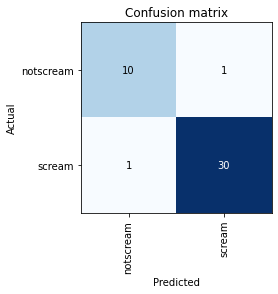

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

<function fastai.learner.load_learner(fname, cpu=True, pickle_module=<module 'pickle' from '/home/justin/.asdf/installs/python/3.10.2/lib/python3.10/pickle.py'>)>

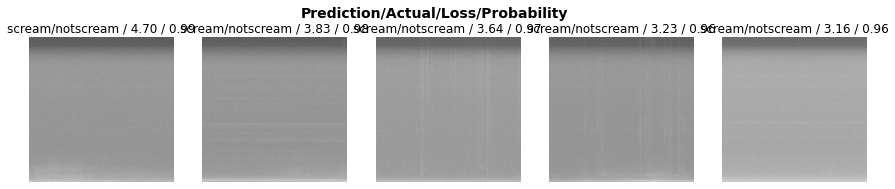

In [6]:
interp.plot_top_losses(5, nrows=1)
load_learner

SuggestedLRs(valley=0.004365158267319202)

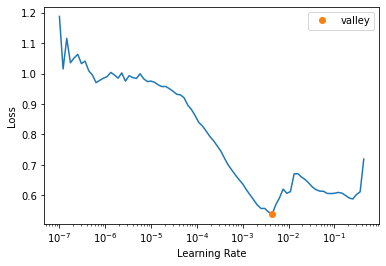

In [5]:
learn.lr_find()

In [28]:
learn.save('model')
#learn.export()

Path('models/model.pth')